## Formatos de datos
### CSV
Comma Separated Values (valores separados por comas). Requiere que cada 
elemento de nuestro conjunto se presente en una línea. Dentro de esa línea, cada uno 
de los atributos del elemento debe estar separado por un único separador, que 
habitualmente es una coma, y seguir siempre el mismo orden. Además, la primera 
línea del fichero, a la que llamaremos cabecera, no contiene datos de ningún 
elemento, sino información de los atributos. Si el campo contiene alguna coma, 
utilizaremos un delimitador como por ejemplo " ".

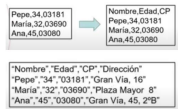

### XML
Extensive Markup Languaje (lenguaje de marcas extensible). Es un lenguaje de
etiquetas utilizado para almacenar datos de forma estructurada.

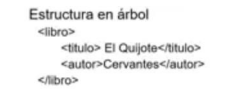

### JSON
JavaScript Object Notation, es un formato muy utilizado hoy en día, tiene el mismo
propósito que el XML que es el intercambio de datos pero no utiliza las etiquetas
abiertas y cerradas, sino que pretende que pese menos, es decir que ocupe menos
espacio.

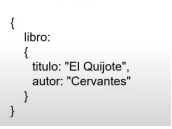

### Avro
Es un formato de almacenamiento basado en filas para Hadoop. Avro se basa
en esquemas. Cuando los datos .avro son leídos siempre está presente el esquema
con el que han sido escritos. Avro utiliza JSON para definir tipos de datos y
protocolos. Es el formato utilizado para la serialización de datos ya que es más rápido
y ocupa menos espacio que los JSON, la serialización de los datos la hace en un
formato binario compacto.
### Parquet
Es un formato de almacenamiento basado en columnas para Hadoop. Fue creado
para poder disponer de un formato de compresión y codificación eficiente. El formato
Parquet está compuesto por tres piezas:

- Row group: es un conjunto de filas en formato columnar.
- Column chunk: son los datos de una columna en grupo. Se puede leer de
manera independiente para mejorar las lecturas.
- Page: es donde finalmente se almacenan los datos, debe ser lo
suficientemente grade para que la compresión sea eficiente.


## Formatos de datos a detalle
Conforme los datos viajan a través de los diferentes pipelines, los ingenieros de datos
deben gestionar la serialización en diferentes formatos y ser capaces de convertir
unos en otros.
Las propiedades que ha de tener un formato de datos son:
- independiente del lenguaje
- expresivo, con soporte para estructuras complejas y anidadas
- eficiente, rápido y reducido
- dinámico, de manera que los programas puedan procesar y definir nuevos
#### Tipos de datos.
- formato de fichero standalone y que permita dividirlo y comprimirlo.
Para que Hadoop/Spark o cualquier herramienta de analítica de datos pueda procesar
documentos, es imprescindible que el formato del fichero permita su división en
fragmentos (splittable in chunks).
Si los clasificamos respecto al formato de almacenamiento tenemos formatos de
tipo:
- texto (más lentos, ocupan más pero son más expresivos y permiten su
interoperabilidad): CSV, XML, JSON, etc...
- binario (mejor rendimiento, ocupan menos, menos expresivos): Avro,
Parquet, ORC, etc...
Si comparamos los formatos más empleados a partir de las propiedades descritas
tenemos:
Las ventajas de elegir el formato correcto son:
-Mayor rendimiento en la lectura y/o escritura
-Ficheros troceables (splittables)
-Soporte para esquemas que evolucionan
-Soporte para compresión de los datos (por ejemplo, mediante Snappy).
### Filas vs Columnas
Los formatos con los que estamos más familiarizados, como son CSV, XML o JSON,
son formatos basados en filas, donde cada registro se almacena en una fila o
documento. Estos formatos son más lentos en ciertas consultas y su almacenamiento
no es óptimo.
### JSON vs JSONL
Un documento JSON contiene diferentes pares de clave-valor con los elementos que
lo componen ocupando varias líneas.
Un tipo específico de JSON es JSON (JSON Lines), el cual almacena una secuencia de
objetos JSON delimitando cada objeto por un saldo de línea.

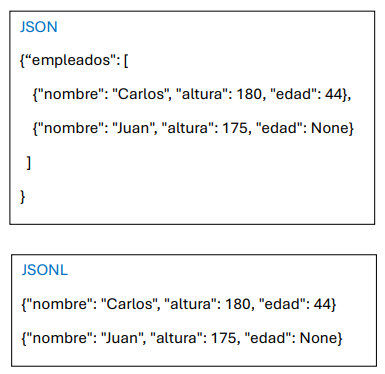

En un formato basado en columnas, cada columna se almacena en su conjunto de
ficheros, es decir, cada registro almacena toda la información de una columna. Al
basarse en columnas, ofrece mejor rendimiento para consultas de determinadas
columnas y/o agregaciones, y el almacenamiento es más óptimo (como todos los
datos de una columna son del mismo tipo, la compresión es mayor).
Supongamos que tenemos los siguientes datos:
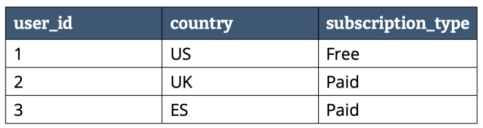
Dependiendo del almacenamiento en filas o columnas tendríamos la siguiente
representación:

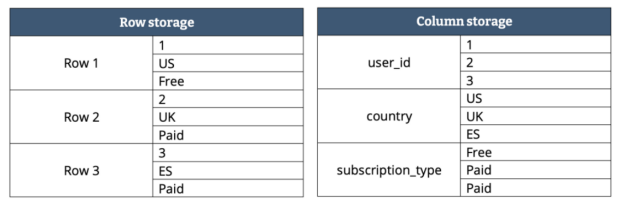

Como hemos comentado previamente, en un formato columnar los datos del mismo
tipo se agrupan, lo que mejora el rendimiento de acceso y reduce el tamaño:

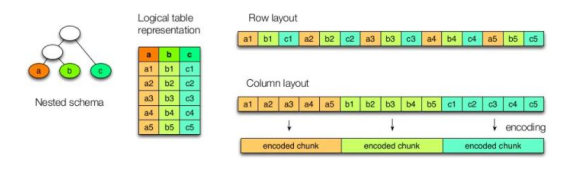

El almacenamiento en columnas y la compresión también presentan algunas
desventajas, ya que no podemos acceder fácilmente a registros de datos individuales.
Para ello, debemos reconstruir registros leyendo datos de varios archivos de
columnas.
Del mismo modo, la actualización de registros supone descomprimir el archivo de
columnas, modificarlo, volver a comprimirlo y escribirlo de nuevo en el
almacenamiento.
Para evitar reescribir columnas completas en cada actualización, las columnas se
dividen en varios archivos, normalmente utilizando estrategias de particionado y
clustering que organizan los datos según los patrones de consulta y modificación de
la tabla. Aun así, la sobrecarga computacional que implica actualizar una sola fila es
muy alta.
Por esto, las bases de datos columnares no se adaptan bien a las cargas de trabajo
transaccionales, por lo que las bases de datos transaccionales (OLTP) suelen utilizar
algún tipo de almacenamiento orientado a filas o registros.

## Hablemos de tamaño
El artículo Apache Parquet: How to be a hero with the open-source columnar data
format compara un formato basado en filas, como CSV, con uno basado en columnas
como Parquet, en base al tiempo y el coste de su lectura en AWS (por ejemplo, AWS
Athena cobra 5$ por cada TB escaneado):

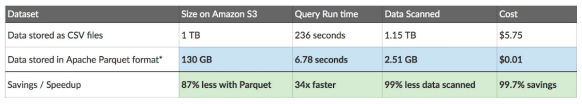

En la tabla podemos observar como 1TB de un fichero CSV en texto plano pasa a
ocupar sólo 130GB mediante Parquet, lo que provoca que las posteriores consultas
tarden menos y, en consecuencia, cuesten menos.
En la siguiente tabla comparamos un fichero CSV compuesto de cuatro columnas
almacenado en S3 mediante tres formatos cuando sólo nos interesa los datos de una
única columna:

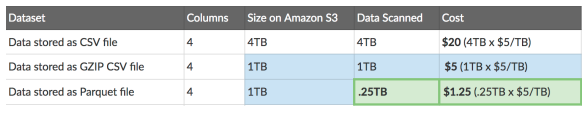

Queda claro que la elección del formato de los datos y la posibilidad de elegir el
formato dependiendo de sus futuros casos de uso puede conllevar un importante
ahorro en tiempo y costes.
Avro
Apache Avro es un formato de almacenamiento basado en filas que es
más rápido y ocupa menos espacio que JSON, debido a que la
serialización de los datos se realiza en un formato binario compacto, con
los metadatos del esquema especificados en JSON.
Tiene soporte para la compresión de bloques y es un formato que
permite la división de los datos (splittable).
Avro es muy popular en el ecosistema de Hadoop y tiene soporte en la
mayoría de herramientas cloud.
Formato
El formato Avro se basa en el uso de esquemas, los cuales definen los
tipos de datos y protocolos mediante JSON. Cuando los datos .avro son
leídos siempre está presente el esquema con el que han sido escritos.
Cada fichero Avro almacena el esquema en la cabecera del fichero y luego
están los datos en formato binario.
Los esquemas se componen de tipos primitivos:
(null, boolean, int, long, float, double, bytes, y string) y compuestos
(record, enum, array, map, union, y fixed).

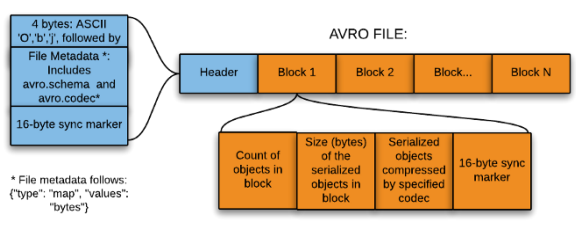

Un ejemplo de esquema podría ser:

In [26]:
schema_json = '''
{
    "type": "record",
    "namespace": "SeveroOchoa",
    "name": "Empleado",
    "fields": [
        { "name" : "Nombre", "type": "string" },
        { "name" : "Altura", "type": "float" },
        { "name" : "Edad", "type": "int" }
    ]
}
'''

# Si deseas guardar este contenido en un archivo .avsc:
with open("empleado.avsc", "w") as f:
    f.write(schema_json)
    
!cat empleado.avsc


{
    "type": "record",
    "namespace": "SeveroOchoa",
    "name": "Empleado",
    "fields": [
        { "name" : "Nombre", "type": "string" },
        { "name" : "Altura", "type": "float" },
        { "name" : "Edad", "type": "int" }
    ]
}


Vamos a realizar un ejemplo donde primero leemos un esquema de un archivo Avro,
y con dicho esquema, escribiremos nuevos datos en un fichero. A continuación,
abrimos el fichero escrito y leemos y mostramos los datos:

Código Python:

## Avro y Python
Para poder serializar y deserializar documentos Avro mediante Python, previamente
debemos instalar la librería avro:

In [10]:
# Ponemos ! Esto le indica a Jupyter que ejecute el comando de shell 
# como si fuera un comando de la terminal.
!pip install avro-python3
# O si utilizamos Anaconda
#conda install -c conda-forge avro-python3

  Preparing metadata (setup.py) ... done
  Created wheel for avro-python3: filename=avro_python3-1.10.2-py3-none-any.whl size=43992 sha256=0d3af70f81535f776e5e69c29425846366452f3848dda0ec9ad262dc2fdb489c
  Stored in directory: /home/jovyan/.cache/pip/wheels/5a/29/4d/510c0e098c49c5e49519f430481a5425e60b8752682d7b1e55
Successfully built avro-python3


Vamos a realizar un ejemplo donde primero leemos un esquema de un archivo Avro,
y con dicho esquema, escribiremos nuevos datos en un fichero. A continuación,
abrimos el fichero escrito y leemos y mostramos los datos:

Código Python:

In [30]:
import avro
import copy
import json
from avro.datafile import DataFileReader, DataFileWriter
from avro.io import DatumReader, DatumWriter

# abrimos el fichero en modo binario y leemos el esquema
schema = avro.schema.parse(open("empleado.avsc", "rb").read())

# escribimos un fichero a partir del esquema leído
with open('empleados.avro', 'wb') as f:
    writer = DataFileWriter(f, DatumWriter(), schema)
    writer.append({"Nombre": "Carlos", "Altura": 180, "Edad": 44})
    writer.append({"Nombre": "Juan", "Altura": 175, "Edad": 20})
    writer.close()
    
# abrimos el archivo creado, lo leemos y mostramos línea a línea
with open("empleados.avro", "rb") as f:
    reader = DataFileReader(f, DatumReader())
    # copiaos los metadatos del fichero leído
    metadata = copy.deepcopy(reader.meta)
    # obtenemos el schema del fichero leído
    schemaFromFile = json.loads(metadata['avro.schema'])
    # recuperamos los empleados
    empleados = [empleado for empleado in reader]
    reader.close()
    
print(f'Schema de empleado.avsc:\n {schema}')
print(f'Schema del fichero empleados.avro:\n {schemaFromFile}')
print(f'Empleados:\n {empleados}')

Schema de empleado.avsc:
 {"type": "record", "name": "Empleado", "namespace": "SeveroOchoa", "fields": [{"type": "string", "name": "Nombre"}, {"type": "float", "name": "Altura"}, {"type": "int", "name": "Edad"}]}
Schema del fichero empleados.avro:
 {'type': 'record', 'name': 'Empleado', 'namespace': 'SeveroOchoa', 'fields': [{'type': 'string', 'name': 'Nombre'}, {'type': 'float', 'name': 'Altura'}, {'type': 'int', 'name': 'Edad'}]}
Empleados:
 [{'Nombre': 'Carlos', 'Altura': 180.0, 'Edad': 44}, {'Nombre': 'Juan', 'Altura': 175.0, 'Edad': 20}]


### Fastavro
Para trabajar con Avro y grandes volúmenes de datos, es mejor utilizar la
librería Fastavro (https://github.com/fastavro/fastavro) la cual ofrece un rendimiento
mayor (en vez de estar codificada en Python puro, tiene algunos fragmentos
realizados mediante Cython).
Primero, hemos de instalar la librería:

In [31]:
!pip install fastavro
# O si utilizamos Anaconda
# conda install -c conda-forge fastavro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.5 MB/s eta 0:00:00a 0:00:01


Como podéis observar a continuación, hemos repetido el ejemplo y el código es muy
similar:

In [36]:
import fastavro
import copy
import json
from fastavro import reader

# abrimos el fichero en modo binario y leemos el esquema
with open("empleado.avsc", "rb") as f:
    schemaJSON = json.load(f)
schemaDict = fastavro.parse_schema (schemaJSON)

empleados = [{"Nombre": "Carlos", "Altura": 180, "Edad": 44}, 
             {"Nombre": "Juan", "Altura": 175, "Edad": 20}]

# escribimos un fichero a partir del esquema leido
with open('empleadosf.avro', 'wb') as f:
    fastavro.writer (f, schemaDict, empleados)

# abrimos el archivo creado, lo leemos y mostramos linea a linea
with open("empleadosf.avro", "rb") as f:
    reader = fastavro.reader (f)
    # copiamos los metadatos del fichero leído
    metadata = copy.deepcopy (reader.metadata)
    # obtenemos el schema del fichero leido
    schemaReader = copy.deepcopy (reader.writer_schema)
    schemaFromFile = json. loads (metadata['avro.schema'])
    # recuperamos los empleados
    empleados = [empleado for empleado in reader]

print (f'Schema de empleado.avsc:\n{schemaDict}')
print (f'Schema del fichero empleadosf.avro:\n{schemaFromFile}')
print (f'Empleados:\n{empleados}')

Schema de empleado.avsc:
{'type': 'record', 'name': 'SeveroOchoa.Empleado', 'fields': [{'name': 'Nombre', 'type': 'string'}, {'name': 'Altura', 'type': 'float'}, {'name': 'Edad', 'type': 'int'}], '__fastavro_parsed': True, '__named_schemas': {'SeveroOchoa.Empleado': {'type': 'record', 'name': 'SeveroOchoa.Empleado', 'fields': [{'name': 'Nombre', 'type': 'string'}, {'name': 'Altura', 'type': 'float'}, {'name': 'Edad', 'type': 'int'}]}}}
Schema del fichero empleadosf.avro:
{'type': 'record', 'name': 'SeveroOchoa.Empleado', 'fields': [{'name': 'Nombre', 'type': 'string'}, {'name': 'Altura', 'type': 'float'}, {'name': 'Edad', 'type': 'int'}]}
Empleados:
[{'Nombre': 'Carlos', 'Altura': 180.0, 'Edad': 44}, {'Nombre': 'Juan', 'Altura': 175.0, 'Edad': 20}]


### Fastavro y Pandas
Finalmente, vamos a realizar un último ejemplo con las dos librerías más utilizadas.
Vamos a leer un fichero CSV de ventas mediante Pandas, y tras limpiar los datos y
quedarnos únicamente con las ventas de Alemania, almacenaremos el resultado del
procesamiento en Avro.

Acceso local:

In [38]:
# Instalamos pandas
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 38.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 35.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 26.9 MB/s eta 0:00:00


Antes de esto debemos asegurarnos que el archivo `pdi_sales.csv` exista dentro de la ruta indicada:

Si usas el docker de la práctica, asegurate de copiar el contenido del archivo [pdi_sales.csv](https://tajamar365.sharepoint.com/:x:/s/3405-MasterIA2024-2025/EdbX1Ds2BShClAxQaHHZYyYBwu5DY1Li3jvXLN_Z7KbhHg?e=Zl8pmI)



docker cp pdi_sales.csv <container>:/home/jovyan/pdi_sales.csv


In [64]:
import pandas as pd
from fastavro import writer, parse_schema

# Leemos el csv mediante pandas
df = pd.read_csv('pdi_sales.csv', sep=';')
# Limpiamos los datos (strip a los códigos postales) y nos quedamos con Alemania
df['Zip'] = df['Zip'].str.strip()
filtro = df.Country=="Germany"
df = df[filtro]

#1. Definimos el esquema
schema = {
    'name': 'Sales', 
    'namespace': 'SeveroOchoa',
    'type': 'record',
    'fields': [
        {'name': 'ProductID', 'type': 'int'}, 
        {'name': 'Date', 'type': 'string'}, 
        {'name': 'Zip', 'type': 'string'}, 
        {'name': 'Units', 'type': 'int'}, 
        {'name': 'Revenue', 'type': 'float'}, 
        {'name': 'Country', 'type': 'string'}
    ]
}
schemaParseado = parse_schema(schema)

# 2. Convertimos el Dataframe a una lista de diccionarios
records = df.to_dict('records')

# 3. Persistimos en un fichero avro
with open('sales. avro', 'wb') as f:
    writer(f, schemaParseado, records)

#### Comprimiendo los datos

¿Y sí comprimimos los datos para ocupen menos espacio en nuestro clúster y por 
tanto, nos cuesten menos dinero?

La compresión de datos es compleja, pero la idea básica es fácil de entender, ya que 
los algoritmos de compresión buscan redundancia y repetición en los datos, 
recodificando los datos para reducir la redundancia.

Al comprimir los datos, además de ocupar menos espacio, la lectura de éstos será 
más rápida y se enviarán menos datos a través de la red, mejorando los tiempos de 
trabajo. Eso sí, no hemos de olvidar que comprimir y descomprimir los archivos 
conlleva un tiempo extra y consumo de recursos para leer o escribir los datos.

Fastavro soporta dos tipos de compresión: gzip (mediante el algoritmo deflate) 
y snappy. Snappy es una biblioteca de compresión y descompresión de datos de gran 
rendimiento que se utiliza con frecuencia en proyectos Big Data, la cual prioriza la 
velocidad sobre el tamaño resultante.

Antes de nada la hemos de instalar mediante:

In [61]:
!pip install python-snappy

Para indicar el tipo de compresión, únicamente hemos de añadir un parámetros extra 
con el algoritmo de compresión en la función/constructor de persistencia:

Fastavro y gzip


In [ ]:
writer(f, schemaParseado, records, 'deflate')

AvroWriter y snappy

In [ ]:
with AvroWriter(hgfs_client, '/user/iabd/sales.avro', schemaParseado, 'snappy') as writer:

Write_dataframe y snapp

In [ ]:
write_dataframe(hdfs_client, '/user/iabd/sales.avro', df, schema=schemaParseado, codec='snappy')

In [ ]:
### Comparando algoritmos de compresión
Respecto a la compresión, sobre un fichero de 100GB, podemos considerar media si 
ronda los 50GB y alta si baja a los 40GB.